In [13]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import re
import string

# For data preprocessing and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# For machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For text cleaning
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# For fetching and parsing emails
import imaplib
import email
from email.header import decode_header


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Cell 2: Load and preprocess the dataset
# Load the CSV file containing email data
data =pd.read_csv('/content/drive/MyDrive/miniproject/spam.csv', encoding='latin-1')
# or 'ISO-8859-1', or any other suitable encoding that might match the file's actual encoding
# Check for null values and basic statistics
data = data[['v1', 'v2']]
print(data.isnull().sum())
print(data.head())

# Clean the email text
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

data['cleaned_email'] = data['v2'].apply(clean_text)

# Encode the labels (spam/ham)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['v1'])

# Split data into features (X) and labels (y)
X = data['cleaned_email']
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


v1    0
v2    0
dtype: int64
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [15]:
# Cell 3: Convert email text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [16]:
# Cell 4: Train and evaluate multiple models

# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train_tfidf, y_train)
y_pred_svc = svc_model.predict(X_test_tfidf)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Naive Bayes Accuracy: 0.9721973094170404
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Logistic Regression Accuracy: 0.9533632286995516
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.68      0.80       150

    accuracy                           0.95      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115

SVC Accuracy: 0.9748878923766816
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
      

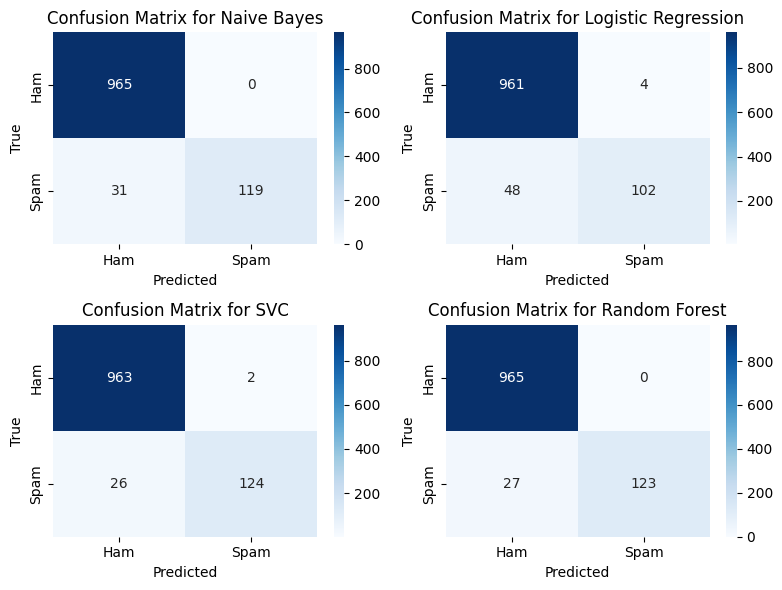

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List of models and their names
models = ['Naive Bayes', 'Logistic Regression', 'SVC', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_rf)
]

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {model_name}')

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot confusion matrix for each model in a 2x2 grid
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes', axes[0, 0])
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression', axes[0, 1])
plot_confusion_matrix(y_test, y_pred_svc, 'SVC', axes[1, 0])
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest', axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


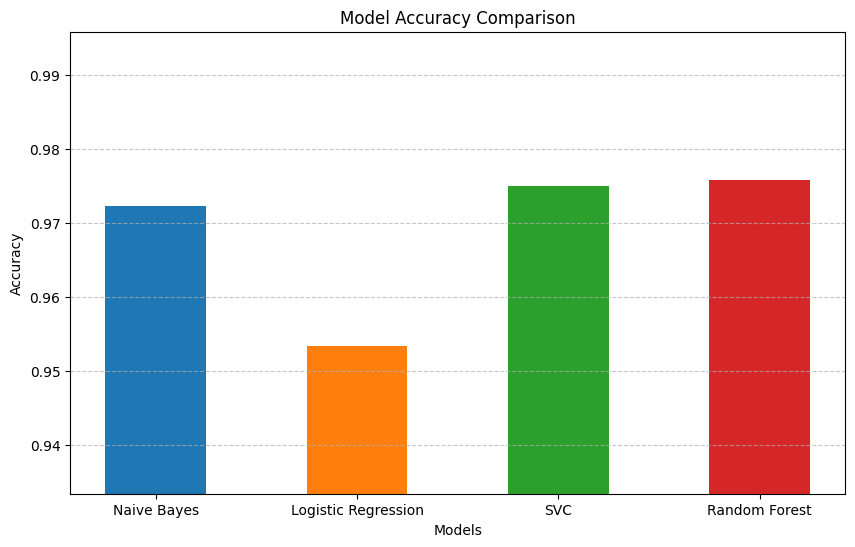

In [18]:
# Cell 5: Visualizations with Improved Bar Chart and Adjusted Y-Axis

# Increase spacing between bars by using bar width and positioning them manually
bar_width = 0.5  # Bar width
x_pos = np.arange(len(models))  # Positions for the bars

# Colors with more contrast
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Distinct colors

# Set y-axis limits to zoom in on small differences
min_accuracy = min(accuracies)  # Find the minimum accuracy value
max_accuracy = max(accuracies)  # Find the maximum accuracy value
padding = 0.02  # Add a small padding to the max and min values for better visibility

# Increase or decrease the padding value based on your preference
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(x_pos, accuracies, width=bar_width, color=colors)

# Adding labels
plt.xticks(x_pos, models)  # Set the model names on the x-axis
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Set y-axis limits to zoom in and make small differences visible
plt.ylim(min_accuracy - padding, max_accuracy + padding)

# Adding grid lines to help visualize differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [19]:
# Cell 5: Train the best model
best_model = rf_model
best_model.fit(X_train_tfidf, y_train)


RandomForestClassifier()

In [20]:
# Cell 6: Fetch the latest 10 emails and classify spam
import email
# Import the message submodule from the email package
from email import message_from_bytes
# ... (rest of your Cell 6 code) ...

# Copy the code from Cell 5 to define best_model
best_model = rf_model  # Assuming rf_model is defined in a previous cell
best_model.fit(X_train_tfidf, y_train)

# Classify emails as spam/ham
predictions = classify_emails(emails, best_model, vectorizer)

# ... (rest of your Cell 6 code) ...

In [21]:
# Cell 6: Fetch the latest 10 emails and classify spam
import email
# Import the message submodule from the email package
from email import message_from_bytes

def get_email_body(msg):
    """Extract the body of the email."""
    if msg.is_multipart():
        for part in msg.walk():
            content_type = part.get_content_type()
            content_disposition = str(part.get("Content-Disposition"))
            if content_type == "text/plain" and "attachment" not in content_disposition:
                return part.get_payload(decode=True).decode()  # Decode the body
    else:
        content_type = msg.get_content_type()
        if content_type == "text/plain":
            return msg.get_payload(decode=True).decode()  # Decode the body
    return None  # Return None if no plain text body is found

def fetch_latest_emails(username, password, imap_server='imap.gmail.com', num_emails=10):
    # Connect to the server
    mail = imaplib.IMAP4_SSL(imap_server)

    # Login to the email account
    mail.login(username, password)

    # Select the mailbox you want to check
    mail.select("inbox")

    # Search for all emails
    status, messages = mail.search(None, 'ALL')

    # Get email IDs
    email_ids = messages[0].split()

    # Select the latest `num_emails` emails (limit the list to the last `num_emails` entries)
    latest_email_ids = email_ids[-num_emails:]

    # List to hold the emails
    emails = []

    # Fetch the latest emails
    for email_id in latest_email_ids:
        _, msg_data = mail.fetch(email_id, '(RFC822)')
        for response_part in msg_data:
            if isinstance(response_part, tuple):
                # Use message_from_bytes directly
                msg = message_from_bytes(response_part[1])
                subject, encoding = decode_header(msg["Subject"])[0]
                if isinstance(subject, bytes):
                    subject = subject.decode(encoding if encoding else 'utf-8')
                from_ = msg.get("From")
                body = get_email_body(msg)  # Assuming get_email_body is defined elsewhere
                # Check if body is None before appending to emails
                if body is not None:
                    emails.append({'subject': subject, 'from': from_, 'body': body})

    return emails

def classify_emails(emails, model, vectorizer):
    """Classify emails as spam or ham"""
    # Filter out emails with None body
    email_bodies = [email['body'] for email in emails if email['body'] is not None]
    email_tfidf = vectorizer.transform(email_bodies)
    predictions = model.predict(email_tfidf)
    return predictions

# Example usage:
# Fetch the latest 10 emails from Gmail
emails = fetch_latest_emails('prathmesh.dudhale22@pccoepune.org', 'pccoe7590')

# Classify emails as spam/ham
predictions = classify_emails(emails, best_model, vectorizer)

# Print results
for email, prediction in zip(emails, predictions):
    label = 'a Spam' if prediction == 1 else 'Real'

    if prediction == 1:
        # Spam -> red text with yellow background
        bold_highlighted_label = '\033[1;41m' + label + '\033[0m'  # 41 for red background
    else:
        # Real -> green text with yellow background
        bold_highlighted_label = '\033[1;42m' + label + '\033[0m'  # 42 for green background

    print(f"Email from {email['from']} with subject '{email['subject']}' is classified as {bold_highlighted_label}.")



Email from "PRATHMESH.D _B078" <prathmesh.dudhale22@pccoepune.org> with subject 'Hello, Found your mail after so many days' is classified as Real.
Email from "PRATHMESH.D _B078" <prathmesh.dudhale22@pccoepune.org> with subject 'Congratulations! You've Won a $1,000 Gift Card! 🎉' is classified as a Spam.
Email from Mahalakshmi Bodireddy <mahalakshmi.bodireddy@pccoepune.org> with subject 'Re: {PCCOE_COMP_FACULTY} The seminar groups mentioned in mail has to
 report to seminar coordinator by tomorrow 2.00 pm' is classified as Real.
Email from Shitalkumar Rawandale <srawandale@gmail.com> with subject 'Reminder : One of The Top Core Company Lattice Semiconductor
 recruitment drive (with stipend approx. 35,000 & salary approx. 14 Lacs) for
 BTech (CS/EnTC - Not for IT Department ) 2026 Batch scheduled on 12-03-2025
 at 9:00 am at PCCOE, Nigdi, Pune II Internship Duration : 1 Year II Start
 Preparing II Registration Link will be shared soon.' is classified as Real.
Email from Shitalkumar Rawand